In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from torch.utils.data import DataLoader
from torchvision import models, datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix


In [3]:
resnet_transform = transforms.Compose([
    transforms.Resize(256),                     # Resize the shorter side to 256 pixels
    transforms.CenterCrop(224),                # Crop the center of the image to 224x224
    transforms.ToTensor(),                     # Convert the image to a PyTorch tensor
    transforms.Normalize(                       # Normalize using ImageNet's mean and std
        mean=[0.485, 0.456, 0.406],            # RGB mean
        std=[0.229, 0.224, 0.225]              # RGB std deviation
    )
])

In [4]:
rhino_dir = './data/rhino/sadati_clean/'
rhino_data = datasets.ImageFolder(rhino_dir, transform = resnet_transform)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.2489083].


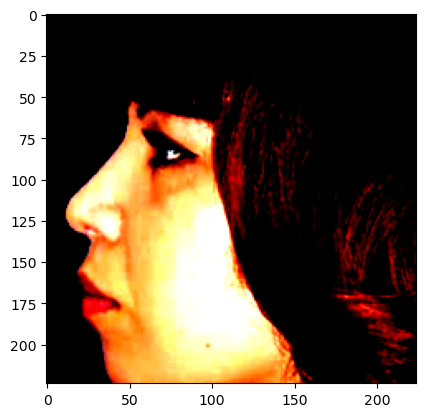

In [5]:
image, label = rhino_data[0]

plt.imshow(image.permute(1,2,0))

In [6]:
train_data, test_data = torch.utils.data.random_split(rhino_data, [10/12, 2/12])


torch.manual_seed(42)

train_loader = DataLoader(train_data, batch_size = 30, shuffle=True)
test_loader = DataLoader(test_data, batch_size = 6)

class_names = rhino_data.classes

In [7]:
model = models.resnet50(weights=None) #Pre-trained = false?

num_classes = 2
model.fc = nn.Linear(model.fc.in_features, num_classes)


In [8]:
# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)



epoch: 0 train loss: 0.6958452463150024
epoch: 0 test loss: 8.59967041015625
epoch: 1 train loss: 1.7293144464492798
epoch: 1 test loss: 1.7699613571166992
epoch: 2 train loss: 0.9090610146522522
epoch: 2 test loss: 0.566992461681366
epoch: 3 train loss: 0.6406228542327881
epoch: 3 test loss: 0.5392686128616333
epoch: 4 train loss: 0.5923207998275757
epoch: 4 test loss: 0.45063361525535583
epoch: 5 train loss: 0.38500848412513733
epoch: 5 test loss: 0.5376036763191223
epoch: 6 train loss: 0.3550444543361664
epoch: 6 test loss: 0.647854745388031
epoch: 7 train loss: 0.20458528399467468
epoch: 7 test loss: 0.8138630390167236
epoch: 8 train loss: 0.06903202831745148
epoch: 8 test loss: 1.2279607057571411
epoch: 9 train loss: 0.03699074313044548
epoch: 9 test loss: 1.7538117170333862
epoch: 10 train loss: 0.03344016149640083
epoch: 10 test loss: 2.062276601791382
epoch: 11 train loss: 0.005608954932540655
epoch: 11 test loss: 2.2114012241363525
epoch: 12 train loss: 0.040276892483234406
ep

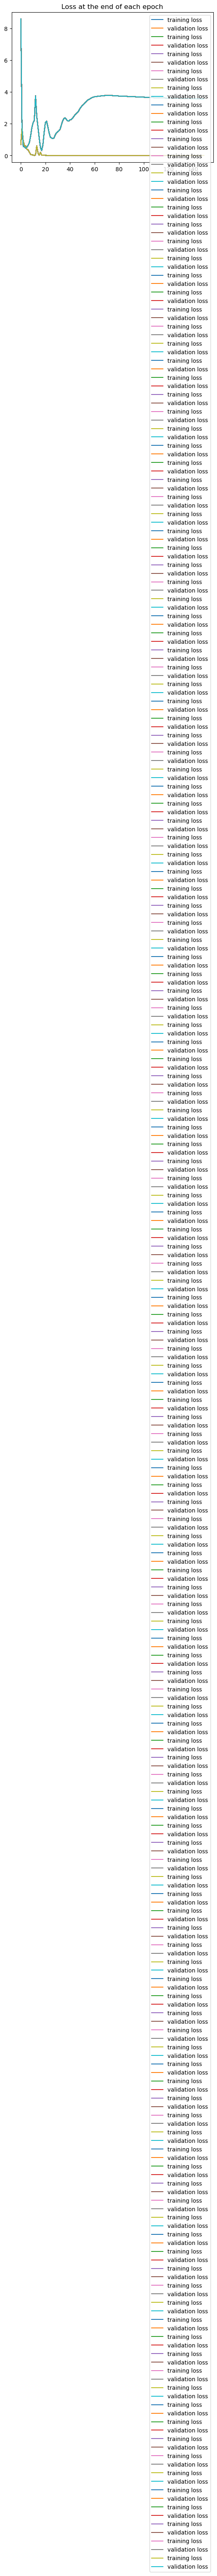

In [ ]:
# Training loop

train_losses = []
test_losses = []
train_correct = []
test_correct = []

for epoch in range(150):  # Example: Train for 5 epochs

    model.train()

    trn_corr = 0
    tst_corr = 0

    for images, y_train in train_loader:
        
        # Forward pass
        y_pred = model(images)
        loss = criterion(y_pred, y_train)

        predicted = torch.max(y_pred.data,1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr



        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    train_losses.append(loss.detach().numpy())
    train_correct.append(trn_corr.detach().numpy())
    
    print(f'epoch: {epoch} train loss: {loss.item()}')

    model.eval()
    with torch.no_grad():
        for images, y_test in test_loader:
            y_val = model(images)

            predicted = torch.max(y_val.data,1)[1]
            tst_corr += (predicted == y_test).sum()
    
    loss = criterion(y_val, y_test)
    test_losses.append(loss.detach().numpy())
    test_correct.append(tst_corr.detach().numpy())

    print(f'epoch: {epoch} test loss: {loss.item()}')


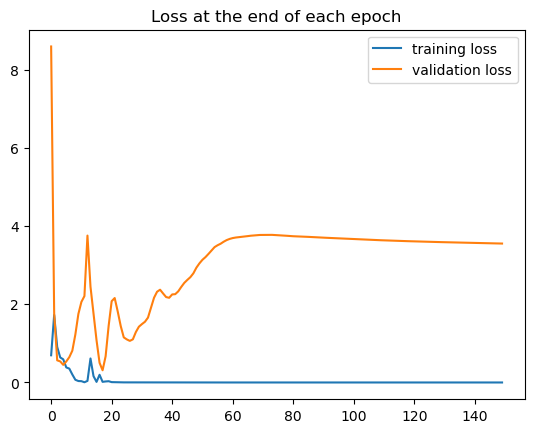

In [10]:
plt.plot(train_losses, label='training loss')
plt.plot(test_losses, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend()

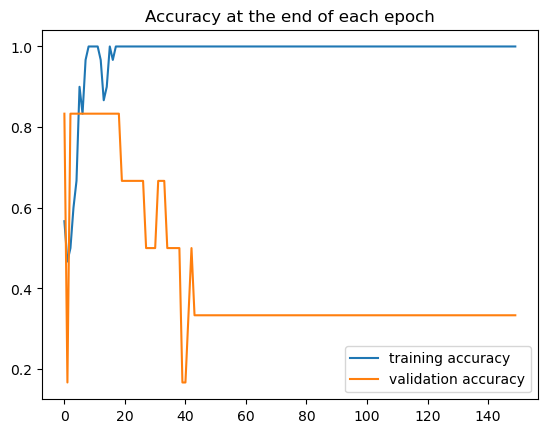

In [11]:
plt.plot([t/30 for t in train_correct], label='training accuracy')
plt.plot([t/6 for t in test_correct], label='validation accuracy')
plt.title('Accuracy at the end of each epoch')
plt.legend()